# Filtering

In [1]:
# Imports
import skimage as ski
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np
import torch
from im_func import show_image

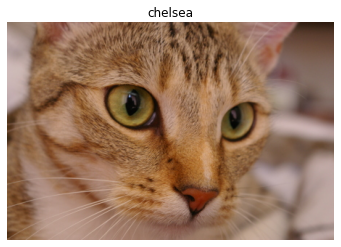

In [3]:
# Load stock image using function
title = 'chelsea'
image = getattr(ski.data, title)()

show_image(image, title)

## Sobel filter

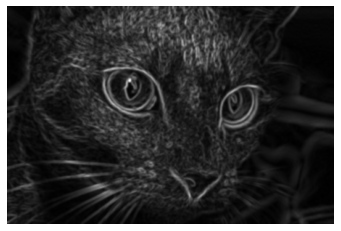

In [4]:
image_gray = ski.color.rgb2gray(image)
image_sobel = ski.filters.sobel(image_gray)
image_sobel = ski.filters.gaussian(image_sobel,sigma=1)

# Increase the contrast
image_sobel -= np.min(image_sobel)
image_sobel /= np.max(image_sobel)

# Show
show_image(image_sobel,vmin=0,vmax=1)

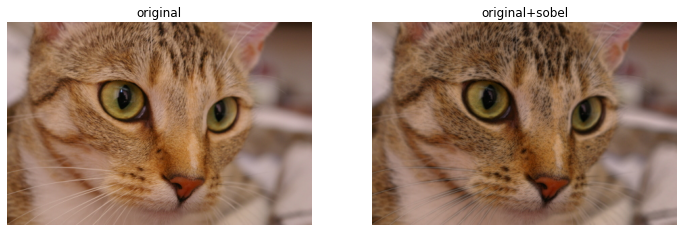

In [5]:
# contour effect or sharpen effect?
# Loop implementation
image_contoured = np.zeros(image.shape,dtype=int)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):     
            image_contoured[i,j,k] = image[i,j,k] * (1.0-image_sobel[i,j]**(1.0/1))
fig, ax = plt.subplots(1,2,figsize=(12,4))
plt.sca(ax[0])
show_image(image,'original')
plt.sca(ax[1])
show_image(image_contoured,'original+sobel')
loop_im = image_contoured.copy()

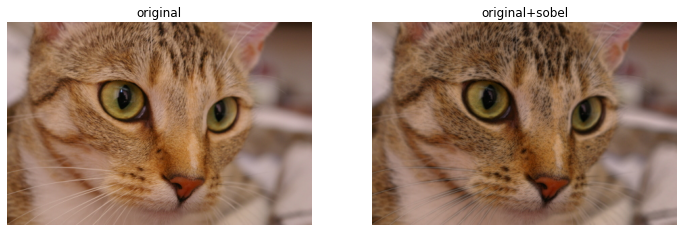

In [6]:
# remove one loop using numpy
image_contoured = np.zeros(image.shape,dtype=int)
for k in range(image.shape[2]):     
    image_contoured[:,:,k] = image[:,:,k] * (1.0-image_sobel[:,:]**(1.0/1))
fig, ax = plt.subplots(1,2,figsize=(12,4))
plt.sca(ax[0])
show_image(image,'original')
plt.sca(ax[1])
show_image(image_contoured,'original+sobel')

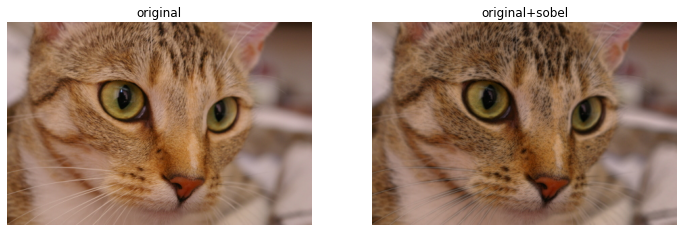

In [7]:
# remove numpy + list comprehension
image_contoured = np.array([(image[:,:,k] * (1.0-image_sobel)).T for k in range(image.shape[2])]).T.astype(int)
fig, ax = plt.subplots(1,2,figsize=(12,4))
plt.sca(ax[0])
show_image(image,'original')
plt.sca(ax[1])
show_image(image_contoured,'original+sobel')

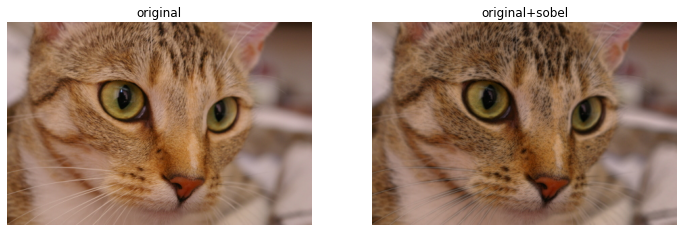

In [33]:
# Using broadcasting in numpy
# image_contoured = np.array([(image[:,:,k] * (1.0-image_sobel)).T for k in range(image.shape[2])]).T.astype(int)
# image*(1.0-image_sobel)
image_contoured = (image.T*(1.0-image_sobel.T)).T.astype(int)
fig, ax = plt.subplots(1,2,figsize=(12,4))
plt.sca(ax[0])
show_image(image,'original')
plt.sca(ax[1])
show_image(image_contoured,'original+sobel')

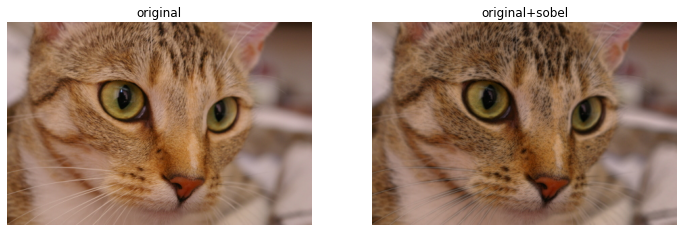

In [31]:
# Using broadcasting in pytorch
image_t = torch.from_numpy(image)
image_sobel_t = torch.from_numpy(image_sobel)
image_contoured = (image_t.T*(1.0-image_sobel_t.T)).T#.astype(int)
fig, ax = plt.subplots(1,2,figsize=(12,4))
plt.sca(ax[0])
show_image(image,'original')
plt.sca(ax[1])
show_image(image_contoured.numpy().astype(int),'original+sobel')